In [1]:
from pandas import read_csv
from os.path import exists
import os
from dotenv import load_dotenv
from load_data import load_data as ld
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ld1 = ld.loaddata()
data_path = os.getenv("DATA_PATH")
file_name = "heart/heart.csv"
file_path = data_path + file_name
df=ld1.load_data(file_path)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Dataset Description

This dataset is originally taken from the UCI Machine Learning Repository (original source)

We describe the predicting variables according to the data card

Age: Age of the patient years

Sex: Sex of the patient (1 = male; 0 = female)

cp: Chest Pain type chest pain type -

Value 0: typical angina
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: asymptomatic
trtbps: resting blood pressure (in mm Hg on admission to the hospital)

chol: cholesterol in mg/dl fetched via BMI sensor

fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg:resting electrocardiographic results -

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved

exang: exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slp: Slope of the peak exercise ST segment -

Value 0: upsloping
Value 1: flat
Value 2: downsloping
caa: number of major vessels (0-3) colored by flourosopy (We have a few cases with value caa= 4 major vessels)

thall: Thallium Stress Test result

Value 0: normal
Value 1: fixed defect
Value 2less chance of heart attack: reversable defect
target: 0= < 50% diameter narrowing (less chance of heart attack) 1= > 50% diameter narrowing (more chance of heart attack)

## Missing values

In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## EDA

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
## Unique values in each feature
import pandas as pd
dictionary = {}
for i in list(df.columns):
    dictionary[i] = df[i].value_counts().shape[0]

pd.DataFrame(dictionary, index=['Unique value cont']).transpose().sort_values(by=['Unique value cont'], ascending = False)

,Unique value cont
chol,152
thalachh,91
trtbps,49
age,41
oldpeak,40
caa,5
cp,4
thall,4
restecg,3
slp,3


Categorical type of values have a low unique value count. We can see that "caa" categorical feature has the most with 5 unique values). For the numerical type of data, we have the that "chol" has the most unique values.

In [8]:
df_copy = df.copy()

In [9]:
y = df_copy['output']
x = df_copy.drop(['output'], axis=1)

Before proceeding to the EDA let's make sure we have a balanced target class.

less chances of heart stroke:  138
more chances of heart stroke:  165


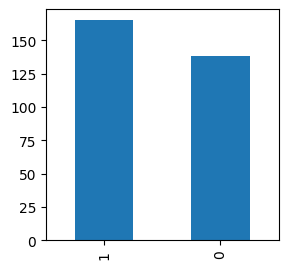

In [10]:
plt.figure(figsize=(3,3))
#ax = sns.countplot(y, label="Count")
ax = y.value_counts().plot(kind='bar')
Value_1, Value_0 = y.value_counts()
print('less chances of heart stroke: ', Value_0)
print('more chances of heart stroke: ', Value_1)

The target class is very balanced! this means we do don't have to perform stratified sampling.

In [11]:
x.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.37,9.08,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.68,0.47,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.97,1.03,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.62,17.54,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.26,51.83,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.15,0.36,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.53,0.53,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.65,22.91,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.33,0.47,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.04,1.16,0.0,0.0,0.8,1.6,6.2


## EDA

In [12]:
cols = x.columns
print("No. of features: ", len(cols))
print("\n", cols)

No. of features:  13

 Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')


In [13]:
# Categorical features
cat = ['sex', 'cp', 'restecg', 'exng', 'slp', 'caa', 'thall', 'fbs']

# Numerical features
num = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

First let's visualize our categorical features with some count plots and then increase the granularity further by applying hue="output" to see which features are more prominent for output=0 "less chance of heart attack" and output=1 "less chance of heart attack".

<AxesSubplot: xlabel='fbs', ylabel='count'>

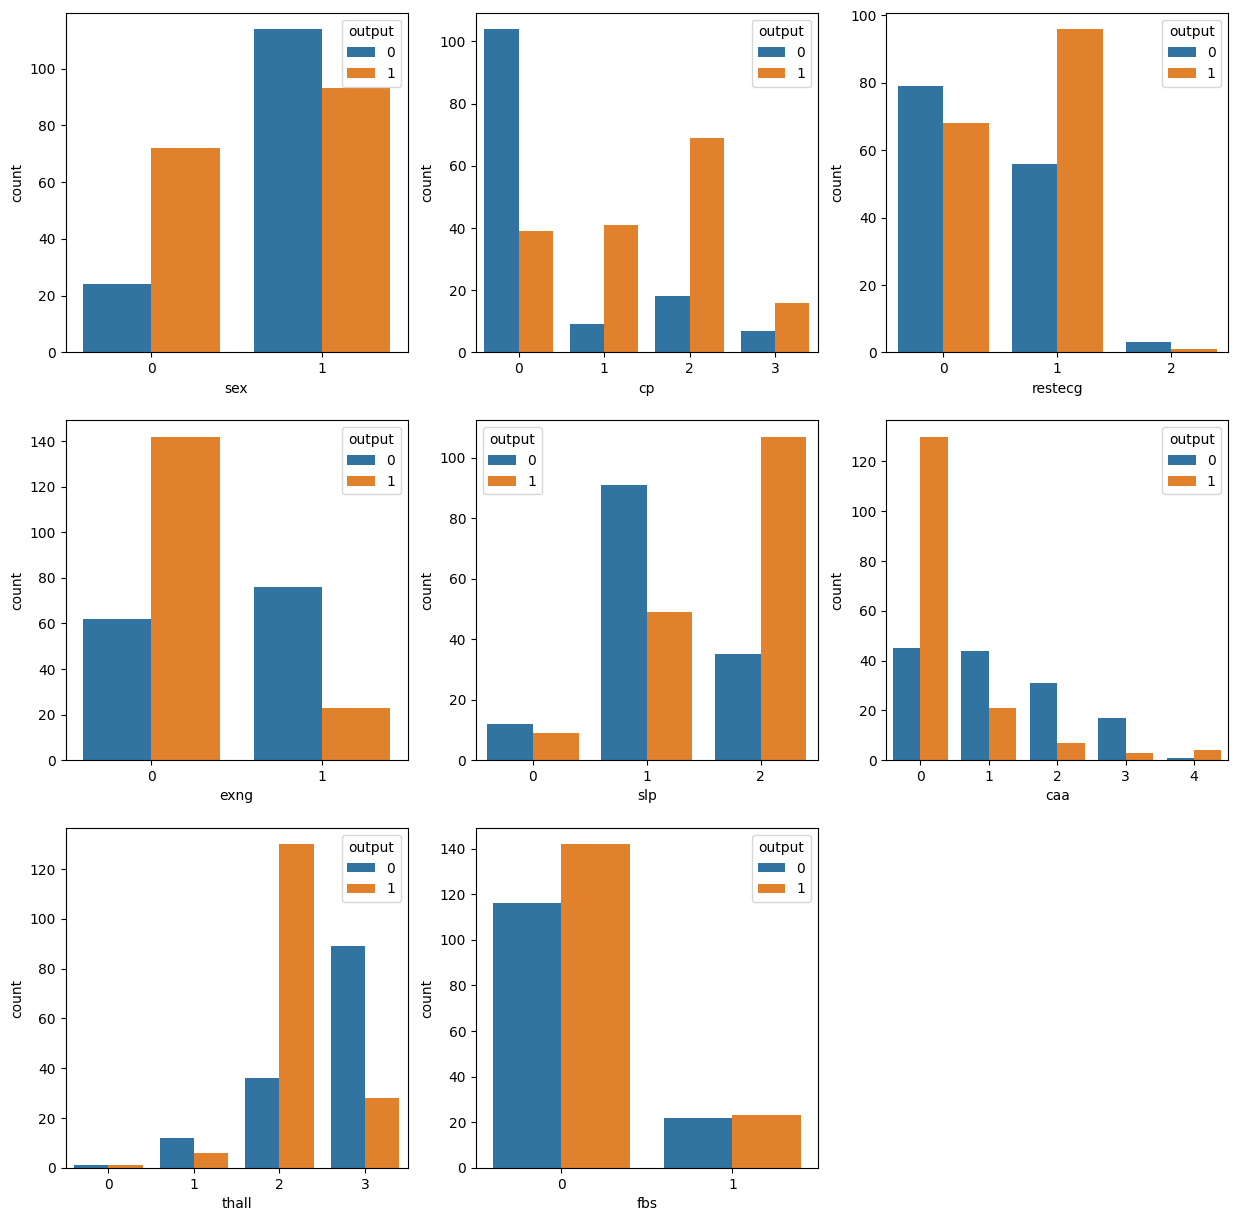

In [14]:
fig = plt.figure(figsize=(15, 15))
gs = fig.add_gridspec(3, 3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])

sns.countplot(ax=ax0,data=df_copy,x='sex',hue="output")
sns.countplot(ax=ax1,data=df_copy,x='cp',hue="output")
sns.countplot(ax=ax2,data=df_copy,x='restecg',hue="output")
sns.countplot(ax=ax3,data=df_copy,x='exng',hue="output")
sns.countplot(ax=ax4,data=df_copy,x='slp',hue="output")
sns.countplot(ax=ax5,data=df_copy,x='caa',hue="output")
sns.countplot(ax=ax6,data=df_copy,x='thall',hue="output")
sns.countplot(ax=ax7,data=df_copy,x='fbs',hue="output")

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'sex'),
  Text(0, 1.5, 'cp'),
  Text(0, 2.5, 'restecg'),
  Text(0, 3.5, 'exng'),
  Text(0, 4.5, 'slp'),
  Text(0, 5.5, 'caa'),
  Text(0, 6.5, 'thall'),
  Text(0, 7.5, 'fbs')])

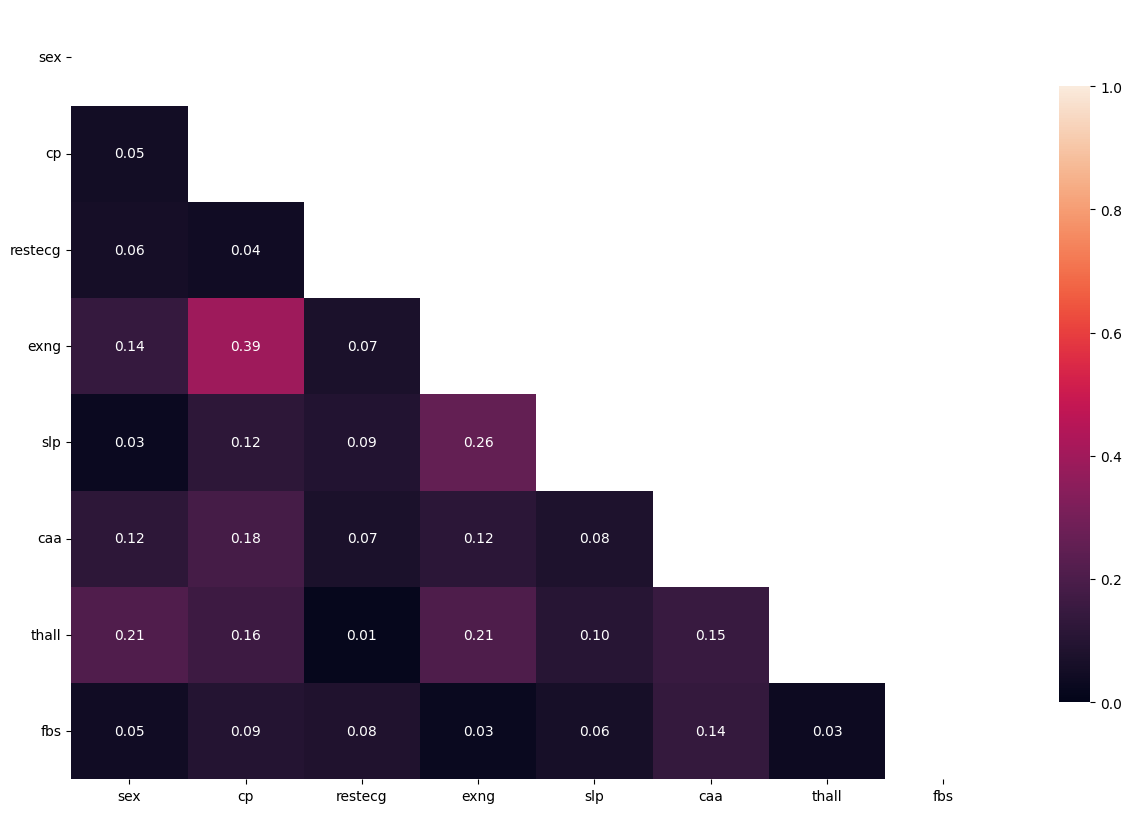

In [15]:
## Correlation of categorical features
corr= df[cat].corr().abs()
mask= np.triu(np.ones_like(corr,dtype=np.bool_))

fig,ax= plt.subplots(figsize=(15,10))

#plot heatmap
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)

#yticks
plt.yticks(rotation=0)

No collinearity in between categorical features

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'trtbps'),
  Text(2, 0, 'chol'),
  Text(3, 0, 'thalachh'),
  Text(4, 0, 'oldpeak')])

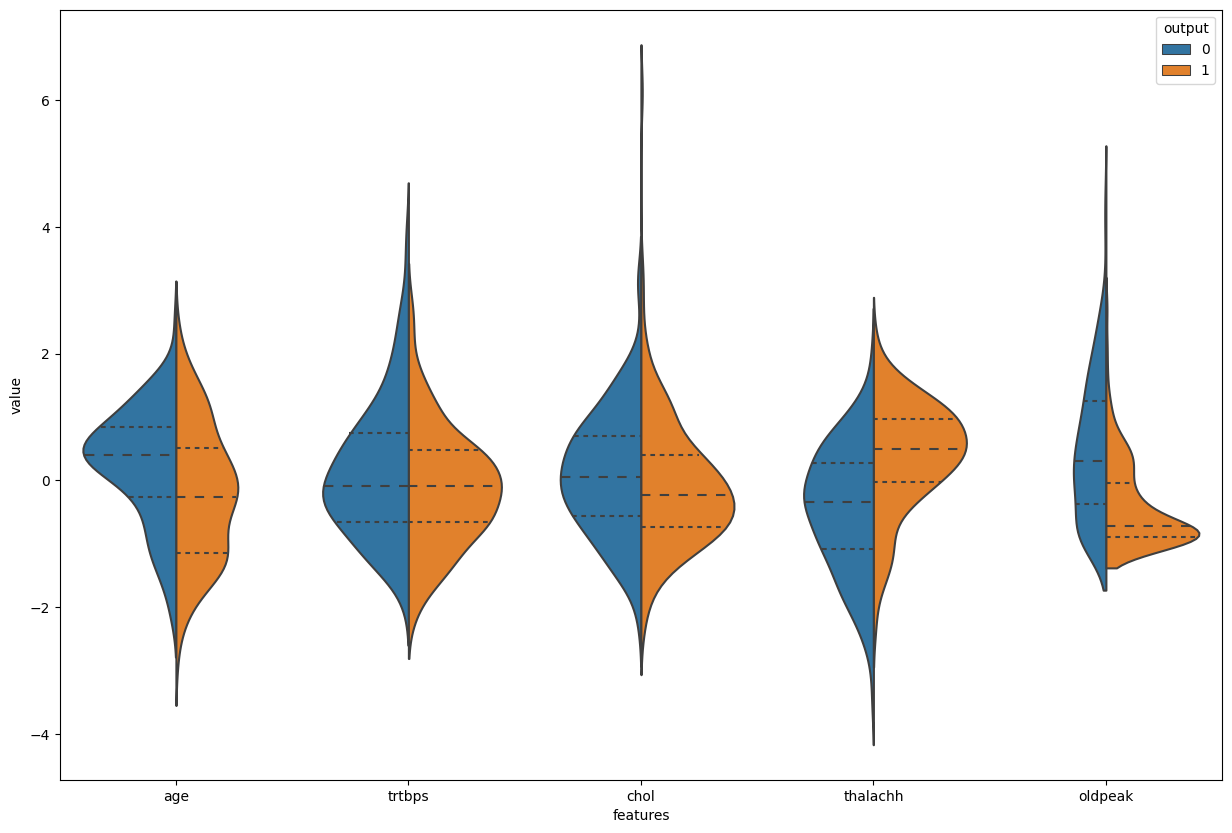

In [16]:
target_data = y
features_data = x
data_n_stand = (features_data - features_data.mean()) / (features_data.std())       # standardization(using Pandas method) 
data_n_num= data_n_stand[num]
data = pd.concat([y,data_n_num],axis=1)
data = pd.melt(data,id_vars="output",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))      
sns.violinplot(x="features", y="value",hue="output",data=data,split=True,inner="quart")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'trtbps'),
  Text(2, 0, 'chol'),
  Text(3, 0, 'thalachh'),
  Text(4, 0, 'oldpeak')])

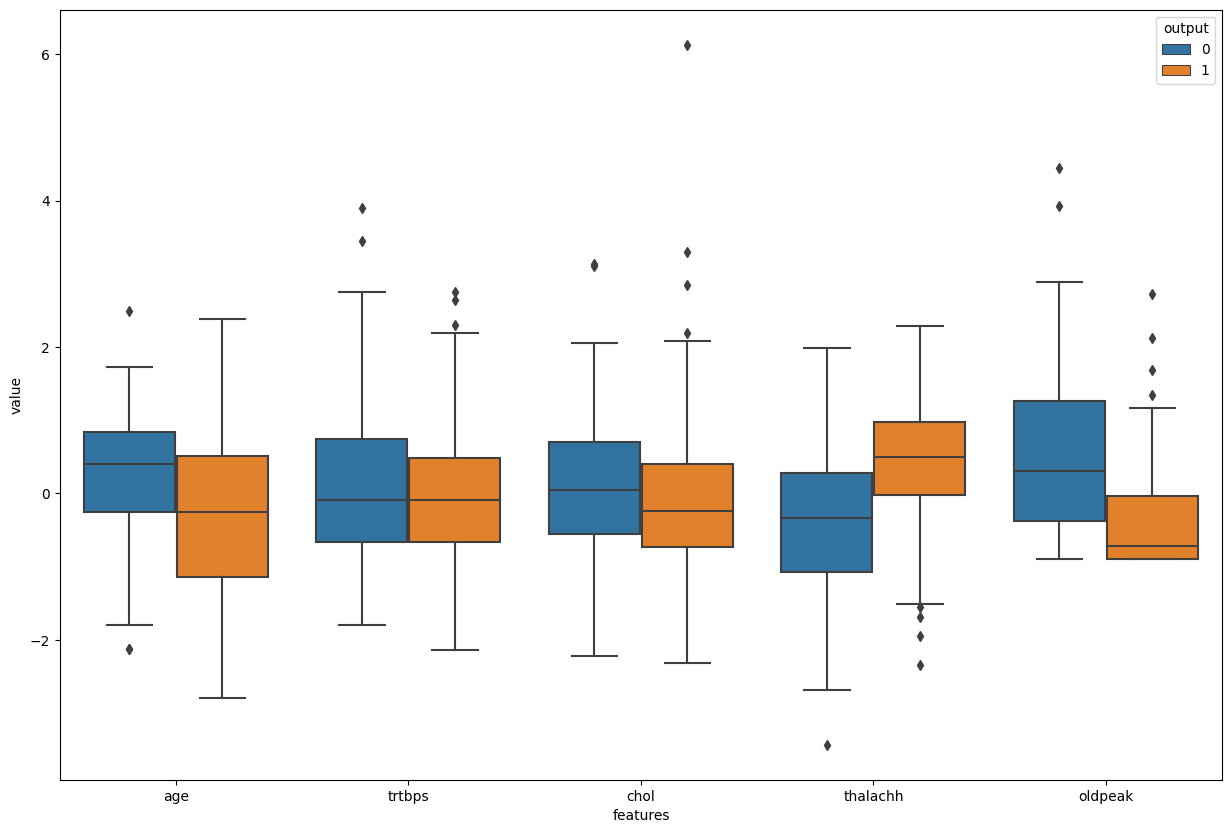

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='features', y='value', hue='output', data=data)
plt.xticks(rotation=0)

In [18]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

## Handling outliers
'''Outlier detection using IQR'''
Q1 = np.percentile(df['chol'], 25, interpolation='midpoint')
Q3 = np.percentile(df['chol'], 75, interpolation='midpoint')

IQR = Q3 - Q1

upper = np.where(df['chol']>=(Q3+1.5*IQR))
lower = np.where(df['chol']>=(Q1-1.5*IQR))
    
df.drop(upper[0], inplace=True)
df.drop(lower[0], inplace=True)

In [19]:
### Using z-score
from scipy import stats
df = df[(np.abs(stats.zscore(df))<3).all(axis=1)]

In [20]:
df.shape

(287, 14)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'trtbps'),
  Text(0, 2.5, 'chol'),
  Text(0, 3.5, 'thalachh'),
  Text(0, 4.5, 'oldpeak')])

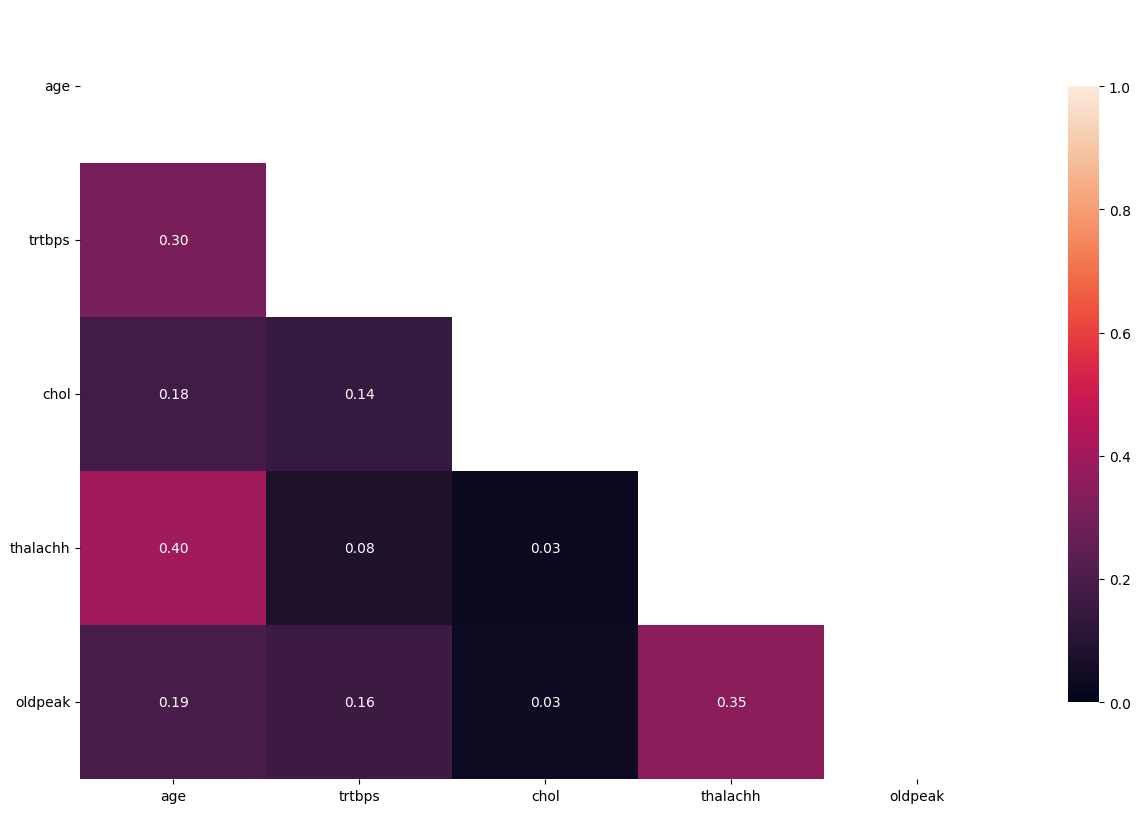

In [21]:
## Correlation between numerical values

corr= df[num].corr().abs()
mask= np.triu(np.ones_like(corr,dtype=np.bool_))

fig,ax= plt.subplots(figsize=(15,10))

#plot heatmap
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)

#yticks
plt.yticks(rotation=0)

Litte correlation between numerical features

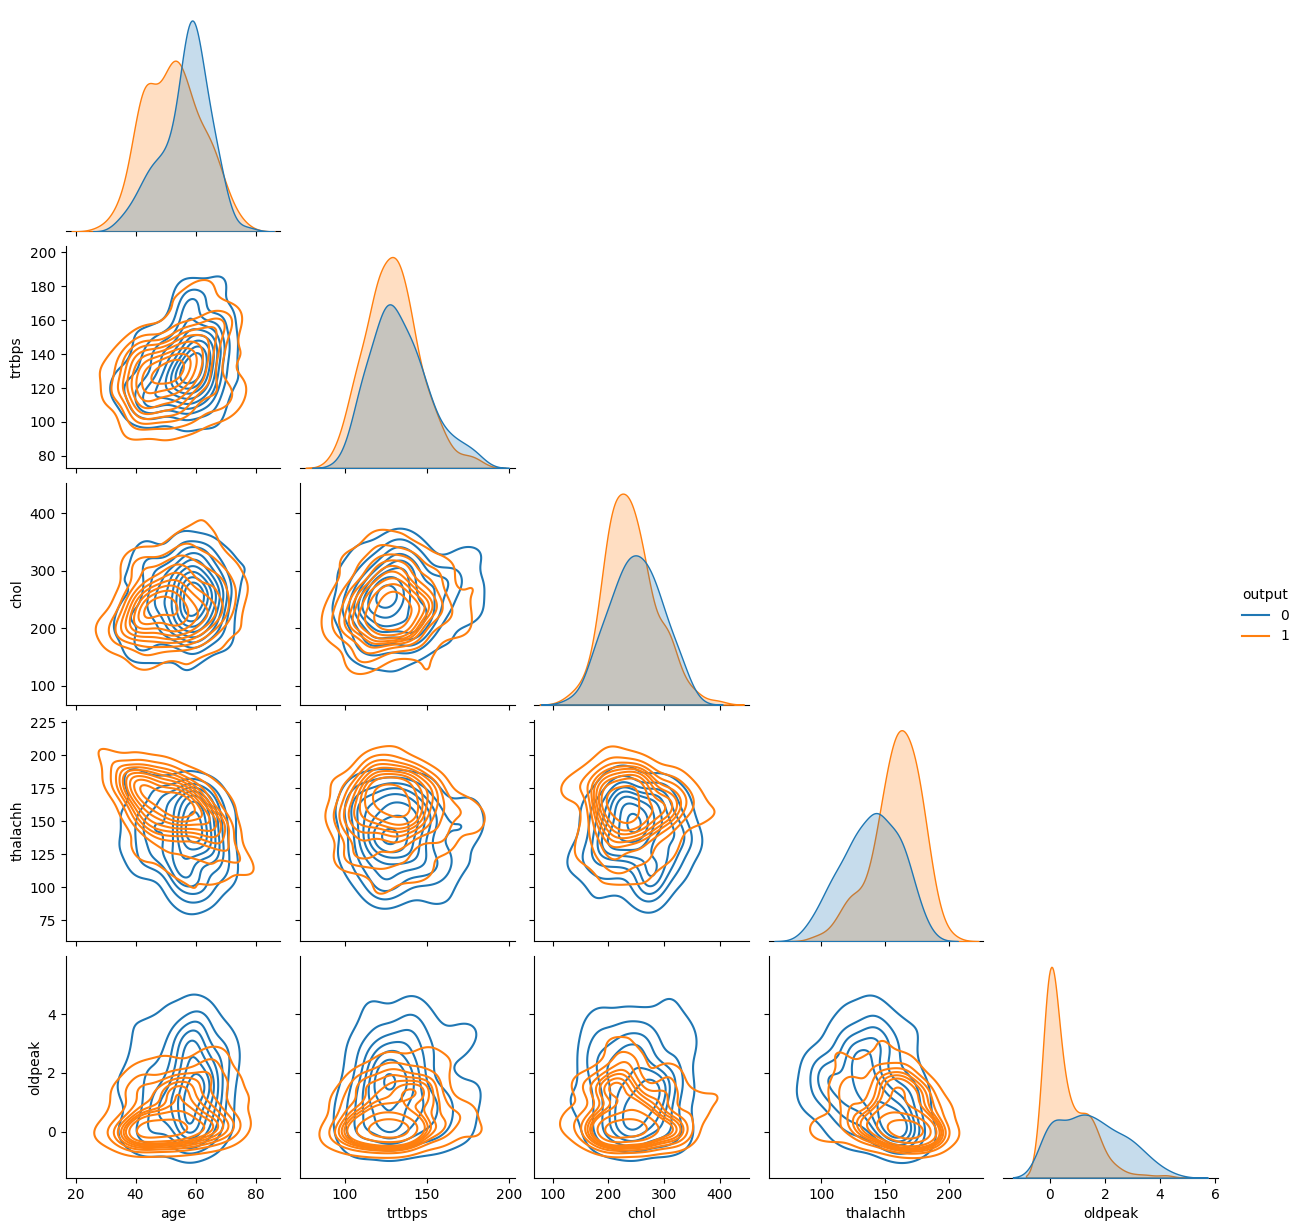

In [22]:
## Distribution using pairplot and KDE
sns.pairplot(data=df, hue='output', x_vars=df[num], y_vars=df[num], kind='kde', corner=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'sex'),
  Text(0, 2.5, 'cp'),
  Text(0, 3.5, 'trtbps'),
  Text(0, 4.5, 'chol'),
  Text(0, 5.5, 'fbs'),
  Text(0, 6.5, 'restecg'),
  Text(0, 7.5, 'thalachh'),
  Text(0, 8.5, 'exng'),
  Text(0, 9.5, 'oldpeak'),
  Text(0, 10.5, 'slp'),
  Text(0, 11.5, 'caa'),
  Text(0, 12.5, 'thall'),
  Text(0, 13.5, 'output')])

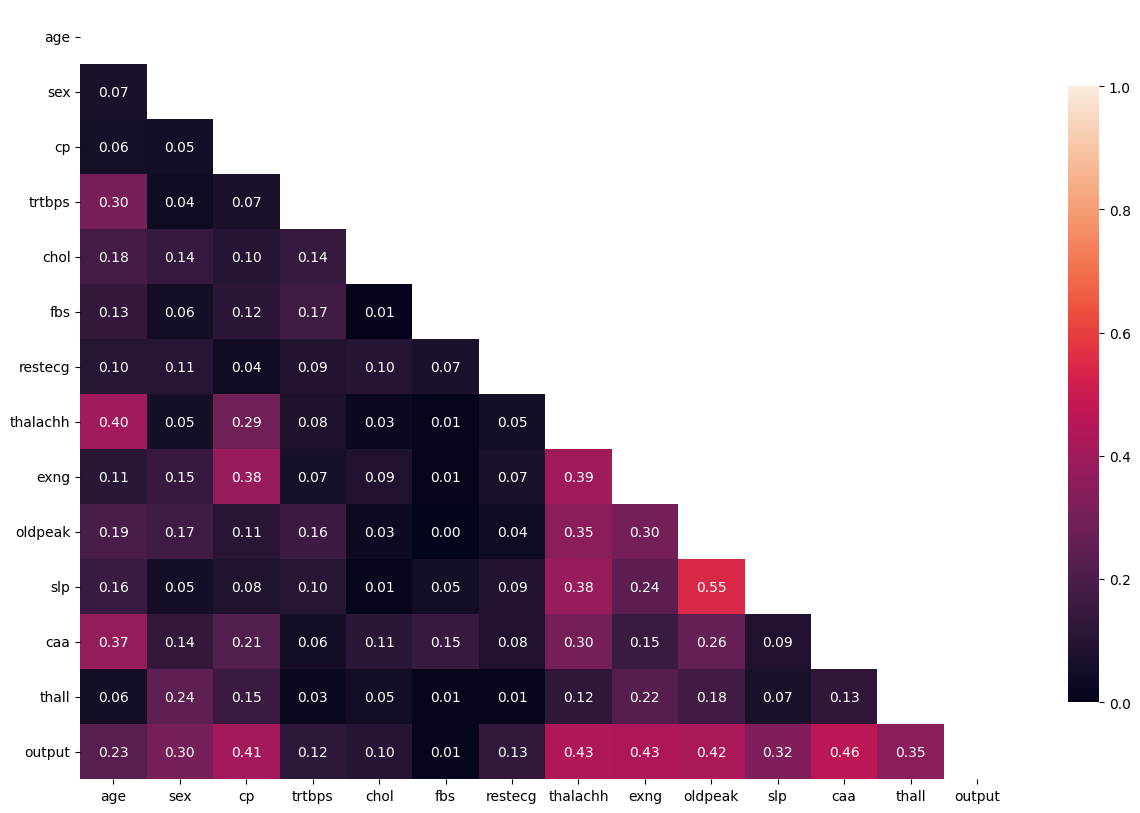

In [23]:
## Correlation with all features

corr= df.corr().abs()
mask= np.triu(np.ones_like(corr,dtype=np.bool_))

fig,ax= plt.subplots(figsize=(15,10))

#plot heatmap
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)

#yticks
plt.yticks(rotation=0)

We have correlation between oldpeak and slp and the correlation is 0.55

## Data Pre-Processing

In [24]:
from sklearn.preprocessing import StandardScaler
# Features and target definition
x = df.drop(['output'], axis=1)
y = df[['output']]

# Standard scalar
scaler = StandardScaler()

# Applying the scaler on the numerical features
x[num] = scaler.fit_transform(x[num])
x.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.954638,1,3,0.823925,-0.250907,1,0,0.008668,0,1.200521,0,0,1
1,-1.909660,1,2,-0.060392,0.119943,0,1,1.652290,0,2.312868,0,0,2
2,-1.468998,0,1,-0.060392,-0.883533,0,0,0.985957,0,0.366261,2,0,2
3,0.183481,1,1,-0.649938,-0.185463,0,1,1.252490,0,-0.189913,2,0,2
4,0.293646,0,0,-0.649938,2.388672,0,1,0.586157,1,-0.375304,2,0,2


In [25]:
## Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
print("The shape of X_train is      ", X_train.shape)
print("The shape of X_test is       ",X_test.shape)
print("The shape of y_train is      ",y_train.shape)
print("The shape of y_test is       ",y_test.shape)

The shape of X_train is       (229, 13)
The shape of X_test is        (58, 13)
The shape of y_train is       (229, 1)
The shape of y_test is        (58, 1)


In [26]:
y.sum()

output    158
dtype: int64

In [27]:
len(y)-y.sum()

output    129
dtype: int64

## Model

In [28]:
#Applying logistic regression model
from sklearn.linear_model import LogisticRegression
log_regr = LogisticRegression()  
log_regr.fit(X_train, y_train)
y_pred = log_regr.predict(X_test)
print(y_pred)

[1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0
 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 0]


C:\Anaconda3\envs\classificationenv\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Test Metrics

In [29]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[26,  3],
       [ 3, 26]], dtype=int64)

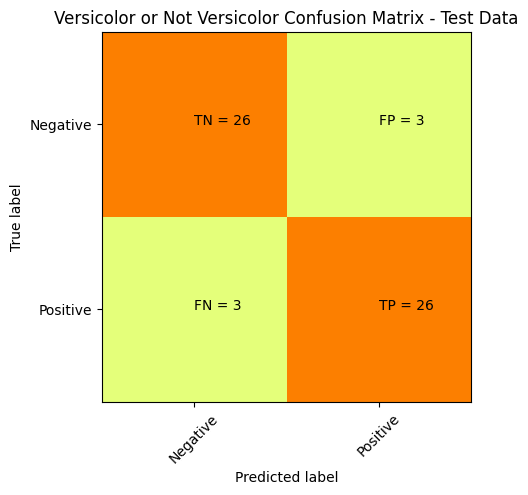

In [30]:
#Confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [31]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.896551724137931


In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred, average=None)

0.896551724137931

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("f1-Score: ", f1_score(y_test, y_pred))

Precision:  0.896551724137931
Recall:  0.896551724137931
f1-Score:  0.896551724137931


#### Train Metrics

In [36]:
y_train_pred = log_regr.predict(X_train)
print(y_train_pred)

[1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0
 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0
 1 0 0 1 1 1 0]


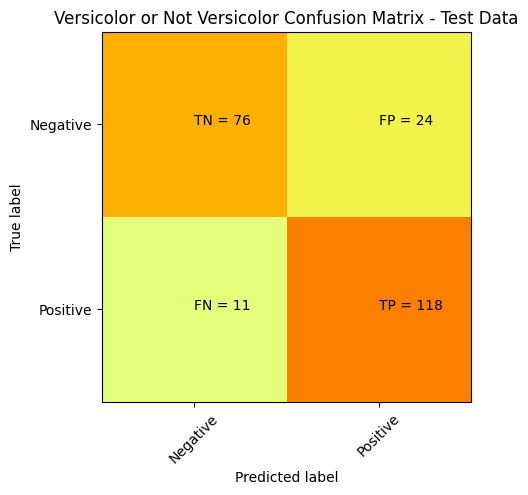

In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred)
#Confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_train_pred)
print(accuracy)

0.8471615720524017


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("f1-Score: ", f1_score(y_train, y_train_pred))

Precision:  0.8309859154929577
Recall:  0.9147286821705426
f1-Score:  0.8708487084870847


In [41]:
#Saving model to disk
import pickle
pickle.dump(log_regr, open('logist_model.pkl','wb'))

## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier(max_depth=4, n_estimators=10)
rclf.fit(X_train, y_train)
y_pred = rclf.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

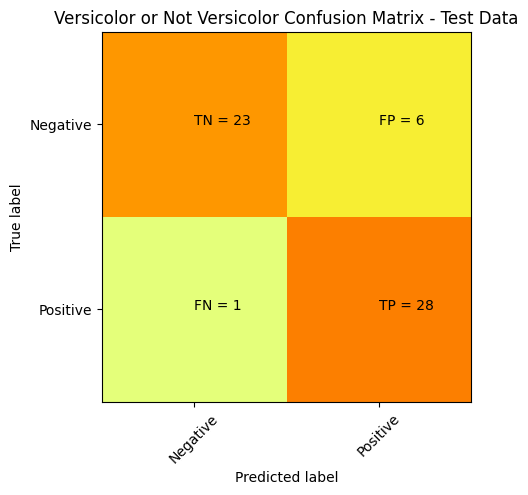

In [55]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
#Confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [56]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("f1-Score: ", f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("roc_auc_score: ",roc_auc_score(y_test, y_pred, average=None))

accuracy:  0.8793103448275862
Precision:  0.8235294117647058
Recall:  0.9655172413793104
f1-Score:  0.888888888888889
roc_auc_score:  0.8793103448275863


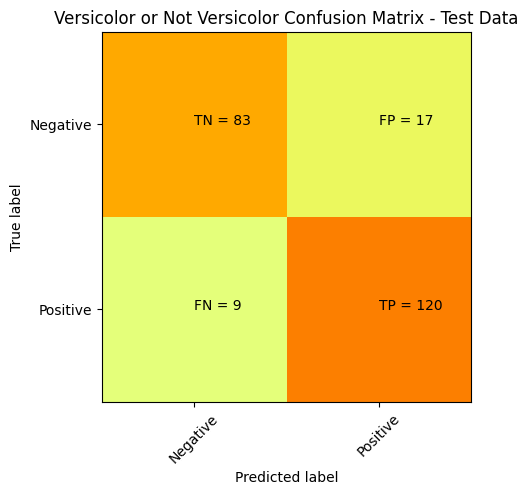

In [59]:
## Training Accuracy
y_train_pred = rclf.predict(X_train)


#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred)
#Confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_train_pred)
print(accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("f1-Score: ", f1_score(y_train, y_train_pred))

0.8864628820960698
Precision:  0.8759124087591241
Recall:  0.9302325581395349
f1-Score:  0.9022556390977443


In [62]:
#Saving model to disk
import pickle
pickle.dump(rclf, open('rf_model.pkl','wb'))

### Hyper parameter tuning

In [57]:
import warnings

In [58]:
warnings.filterwarnings('ignore')

In [51]:
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5, 10, 50, 100, 250],
    "max_depth":[2, 4, 8, 32, None]
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc, parameters, cv=5)
cv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [52]:
print("Best parameters: ", cv.best_params_)
print("Best estimators: ", cv.best_estimator_)

Best parameters:  {'max_depth': 4, 'n_estimators': 10}
Best estimators:  RandomForestClassifier(max_depth=4, n_estimators=10)


### XGBoost Classifier

In [69]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(max_depth=5, min_child_weight=5, n_estimators=10, random_state=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Prediction
y_pred = xgb_model.predict(X_test)

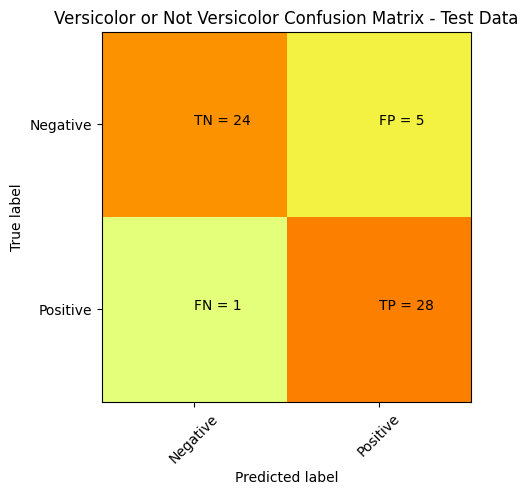

In [70]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
#Confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [71]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("f1-Score: ", f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("roc_auc_score: ",roc_auc_score(y_test, y_pred, average=None))



accuracy:  0.896551724137931
Precision:  0.8484848484848485
Recall:  0.9655172413793104
f1-Score:  0.9032258064516129
roc_auc_score:  0.896551724137931


In [72]:
print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


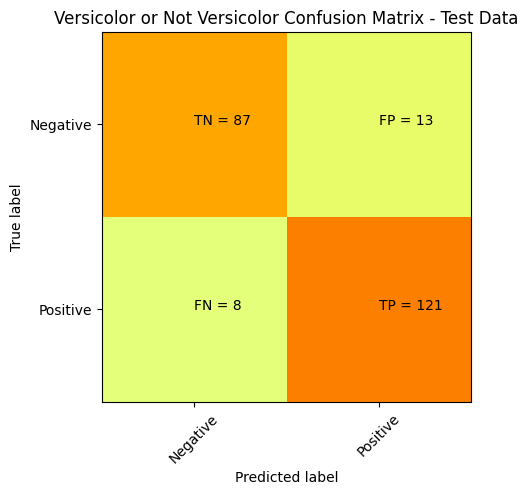

In [73]:
## Train Accuracy

y_train_pred = xgb_model.predict(X_train)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred)
#Confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy: ",accuracy)
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))
print("f1-Score: ", f1_score(y_train, y_train_pred))

Accuracy:  0.9082969432314411
Precision:  0.9029850746268657
Recall:  0.937984496124031
f1-Score:  0.9201520912547528


In [76]:
#Saving model to disk
import pickle
pickle.dump(xgb_model, open('xgb_model.pkl','wb'))

### Hyper Parameter tuning

In [67]:
param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'n_estimators': [5, 10, 50, 100, 150, 200, 250]   
}

from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(xgb_model, param_test1, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, predictor='auto',
                                     random_state=0, ...),
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2),
                         'n_estimators': [5, 10, 50, 100, 150, 200, 250]})

In [68]:
print("Best parameters: ", cv.best_params_)
print("Best estimators: ", cv.best_estimator_)

Best parameters:  {'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 10}
Best estimators:  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=5,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)


### AdaBoost

In [83]:
from sklearn.ensemble import AdaBoostClassifier
adb_clf = AdaBoostClassifier(algorithm='SAMME', learning_rate=1.04, n_estimators=5)
adb_clf.fit(X_train, y_train)
y_pred = adb_clf.predict(X_test)

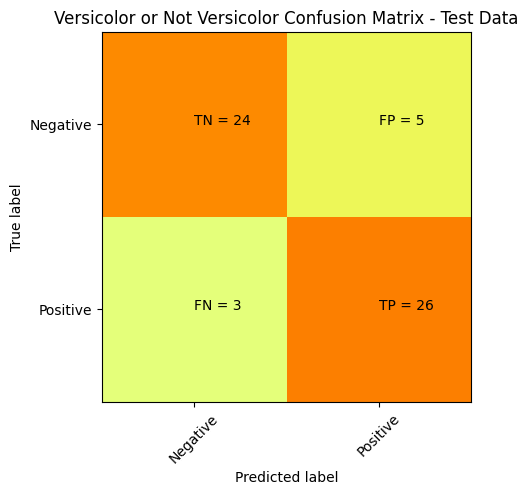

In [84]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
#Confusion matrix visualization
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Versicolor or Not Versicolor Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy)

from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("f1-Score: ", f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print("roc_auc_score: ",roc_auc_score(y_test, y_pred, average=None))

#Before parameter tuning 79.31%

accuracy:  0.8620689655172413
Precision:  0.8387096774193549
Recall:  0.896551724137931
f1-Score:  0.8666666666666666
roc_auc_score:  0.8620689655172413


In [86]:
print(adb_clf)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1.04, n_estimators=5)


In [82]:
### hyper parameter tuning
parameters = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30],
    'learning_rate': [(0.97 + x / 100) for x in range(0, 8)],
    'algorithm': ['SAMME', 'SAMME.R']
}

cv = GridSearchCV(adb_clf, parameters, cv=5)
cv.fit(X_train, y_train)
print("Best parameters: ", cv.best_params_)
print("Best estimators: ", cv.best_estimator_)

Best parameters:  {'algorithm': 'SAMME', 'learning_rate': 1.04, 'n_estimators': 5}
Best estimators:  AdaBoostClassifier(algorithm='SAMME', learning_rate=1.04, n_estimators=5)
